In [1]:
import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.colors import Normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('../Datos/dataset_modelo.csv')

ocupacion_columns = ['Ocupacion del Hombre', 'Ocupacion de la Mujer']

df['Clase de Union'] = df['Clase de Union'].replace(9, np.nan)
df['Numero de Nupcias del Hombre'] = df['Numero de Nupcias del Hombre'].replace(9, np.nan)
df['Numero de Nupcias de la Mujer'] = df['Numero de Nupcias de la Mujer'].replace(9, np.nan)
df['Edad del Hombre'] = df['Edad del Hombre'].replace(999, np.nan)
df['Edad de la Mujer'] = df['Nacionalidad de la Mujer'].replace(999, np.nan)
df['Pueblo de Pertenencia del Hombre'] = df['Pueblo de Pertenencia del Hombre'].replace(9, np.nan)
df['Pueblo de Pertenencia de la Mujer'] = df['Pueblo de Pertenencia de la Mujer'].replace(9, np.nan)
df['Nacionalidad del Hombre'] = df['Nacionalidad del Hombre'].replace(9999, np.nan)
df['Nacionalidad de la Mujer'] = df['Nacionalidad de la Mujer'].replace(9999, np.nan)
df['Escolaridad del Hombre'] = df['Escolaridad del Hombre'].replace(9, np.nan)
df['Escolaridad de la Mujer'] = df['Escolaridad de la Mujer'].replace(9, np.nan)
df['Ocupacion del Hombre'] = df['Ocupacion del Hombre'].replace(99, np.nan)
df['Ocupacion de la Mujer'] = df['Ocupacion de la Mujer'].replace(99, np.nan)
df[ocupacion_columns] = df[ocupacion_columns].replace(["IGNORADO", "NEOG"], np.nan)
df['Area Geografica de la Ocurrencia'] = df['Area Geografica de la Ocurrencia'].replace(9, np.nan)


C:\Users\villa\AppData\Local\Temp\ipykernel_8496\1121537545.py:1: DtypeWarning: Columns (16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Datos/dataset_modelo.csv')


In [4]:
# Cargar los datos

# 3. Seleccionar las características para el modelo
selected_features = [
    "Ano Ocurrencia", 
    "Departamento de Ocurrencia", 
    "Edad del Hombre", 
    "Edad de la Mujer",
    "Escolaridad del Hombre",
    "Escolaridad de la Mujer"
]

# Preparar los datos
X = df[selected_features].copy()
y = df['divorcio']

# Manejar valores faltantes en características numéricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')
X[numeric_features] = imputer.fit_transform(X[numeric_features])

# Manejar valores faltantes en características categóricas
categorical_features = X.select_dtypes(include=['object']).columns
X[categorical_features] = X[categorical_features].fillna('None')

# Objetos de preprocesamiento para pipeline de modelos
preprocesador_categorico = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocesador_numerico = StandardScaler()

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [5]:
# Generación de preprocesador
preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_categorico, categorical_features),
    ('standard_scaler',preprocesador_numerico, numeric_features)
])

# Modelos

### Modelo 1

In [6]:
knn_modelo1 = make_pipeline(preprocesador, KNeighborsClassifier(
    algorithm='ball_tree',
    n_neighbors=12,
    p=1,  # Distancia Manhattan
    weights='distance')
)

start = time.time()
knn_modelo1.fit(X_train, y_train)
tiempo_entrenamiento_knn1 = time.time() - start
y_pred_knn1 = knn_modelo1.predict(X_test)
accuracy_knn1 = accuracy_score(y_test, y_pred_knn1)

print(f"Accuracy del modelo KNN 1: {accuracy_knn1:.4f}")
print(f"Tiempo de entrenamiento KNN 1: {tiempo_entrenamiento_knn1:.2f} segundos")


Accuracy del modelo KNN 1: 0.9482
Tiempo de entrenamiento KNN 1: 0.95 segundos


### Modelo 2

In [ ]:
knn_modelo2 = make_pipeline(preprocesador, KNeighborsClassifier(
    algorithm='kd_tree',
    n_neighbors=8,
    p=2,  # Distancia Euclidiana
    weights='uniform')
)

start = time.time()
knn_modelo2.fit(X_train, y_train)
tiempo_entrenamiento_knn2 = time.time() - start
y_pred_knn2 = knn_modelo2.predict(X_test)
accuracy_knn2 = accuracy_score(y_test, y_pred_knn2)

print(f"Accuracy del modelo KNN 2: {accuracy_knn2:.4f}")
print(f"Tiempo de entrenamiento KNN 2: {tiempo_entrenamiento_knn2:.2f} minutos")


Accuracy del modelo KNN 2: 0.9476
Tiempo de entrenamiento KNN 2: 1.33 segundos


### Modelo 3

In [9]:
knn_modelo3 = make_pipeline(preprocesador, KNeighborsClassifier(
    algorithm='auto',
    n_neighbors=15,
    p=1.5,  # Distancia Minkowski con p=1.5
    weights='distance',
    leaf_size=50)
)

start = time.time()
knn_modelo3.fit(X_train, y_train)
tiempo_entrenamiento_knn3 = time.time() - start
y_pred_knn3 = knn_modelo3.predict(X_test)
accuracy_knn3 = accuracy_score(y_test, y_pred_knn3)

print(f"Accuracy del modelo KNN 3: {accuracy_knn3:.4f}")
print(f"Tiempo de entrenamiento KNN 3: {tiempo_entrenamiento_knn3:.2f} mimutos")


Accuracy del modelo KNN 3: 0.9483
Tiempo de entrenamiento KNN 3: 1.28 segundos


# Comparación 

In [ ]:
# Comparación de los tres modelos KNN
modelos = ['KNN 1', 'KNN 2', 'KNN 3']
accuracies = [accuracy_knn1, accuracy_knn2, accuracy_knn3]
tiempos = [tiempo_entrenamiento_knn1, tiempo_entrenamiento_knn2, tiempo_entrenamiento_knn3]

comparacion_df = pd.DataFrame({
    'Modelo': modelos,
    'Configuración': [
        'ball_tree, n=12, Manhattan, distance', 
        'kd_tree, n=8, Euclidiana, uniform', 
        'auto, n=15, Minkowski p=1.5, distance'
    ],
    'Accuracy': accuracies,
    'Tiempo de entrenamiento (s)': tiempos
})

print(comparacion_df.sort_values('Accuracy', ascending=False))

  Modelo                          Configuración  Accuracy  \
2  KNN 3  auto, n=15, Minkowski p=1.5, distance  0.948304   
0  KNN 1   ball_tree, n=12, Manhattan, distance  0.948244   
1  KNN 2      kd_tree, n=8, Euclidiana, uniform  0.947563   

   Tiempo de entrenamiento (s)  
2                     1.279780  
0                     0.949966  
1                     1.334899  


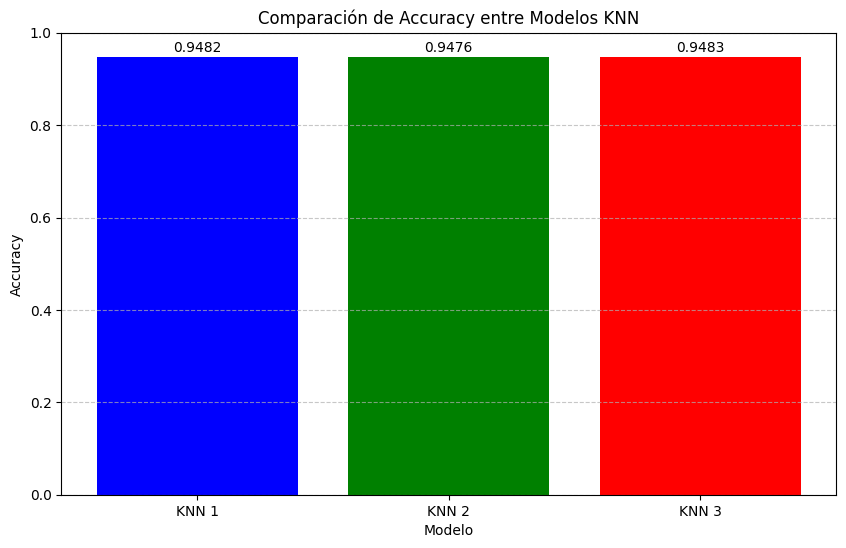

In [13]:
# Gráfico simple comparativo de accuracy
plt.figure(figsize=(10, 6))
plt.bar(['KNN 1', 'KNN 2', 'KNN 3'], [accuracy_knn1, accuracy_knn2, accuracy_knn3], color=['blue', 'green', 'red'])

# Añadir etiquetas y título
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy entre Modelos KNN')

# Mostrar valores sobre las barras
for i, v in enumerate([accuracy_knn1, accuracy_knn2, accuracy_knn3]):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.ylim(0, 1)  # Establecer límite en el eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
print("Reporte de clasificación para Modelo 1:\n", classification_report(y_test, y_pred_knn1))
print("\nReporte de clasificación para Modelo 2:\n", classification_report(y_test, y_pred_knn2))
print("\nReporte de clasificación para Modelo 3:\n", classification_report(y_test, y_pred_knn3))


Reporte de clasificación para Modelo 1:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    234531
           1       0.64      0.33      0.44     15142

    accuracy                           0.95    249673
   macro avg       0.80      0.66      0.71    249673
weighted avg       0.94      0.95      0.94    249673


Reporte de clasificación para Modelo 2:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    234531
           1       0.63      0.33      0.43     15142

    accuracy                           0.95    249673
   macro avg       0.79      0.66      0.70    249673
weighted avg       0.94      0.95      0.94    249673


Reporte de clasificación para Modelo 3:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    234531
           1       0.63      0.36      0.46     15142

    accuracy                           0.95    249673
   

<Figure size 800x600 with 0 Axes>

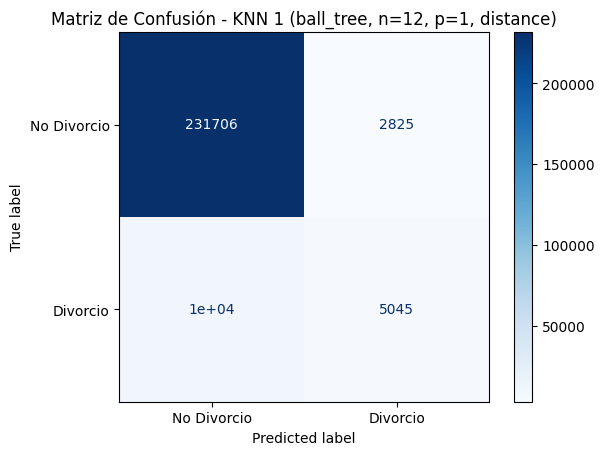

<Figure size 800x600 with 0 Axes>

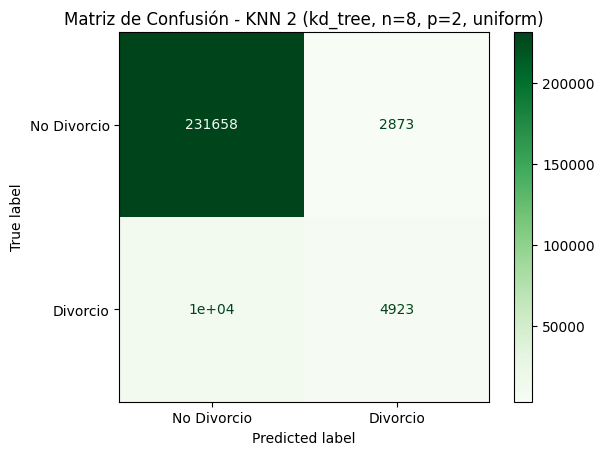

<Figure size 800x600 with 0 Axes>

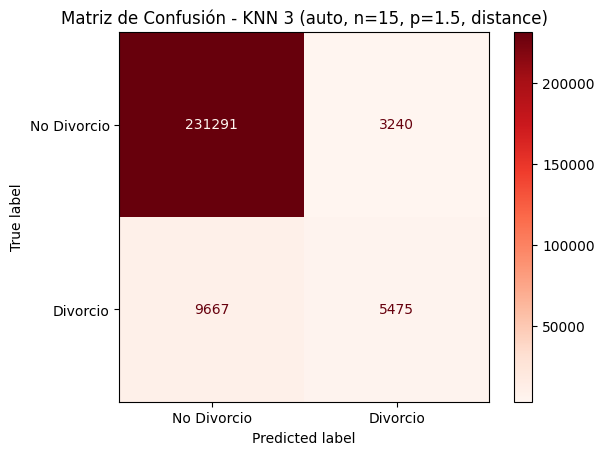

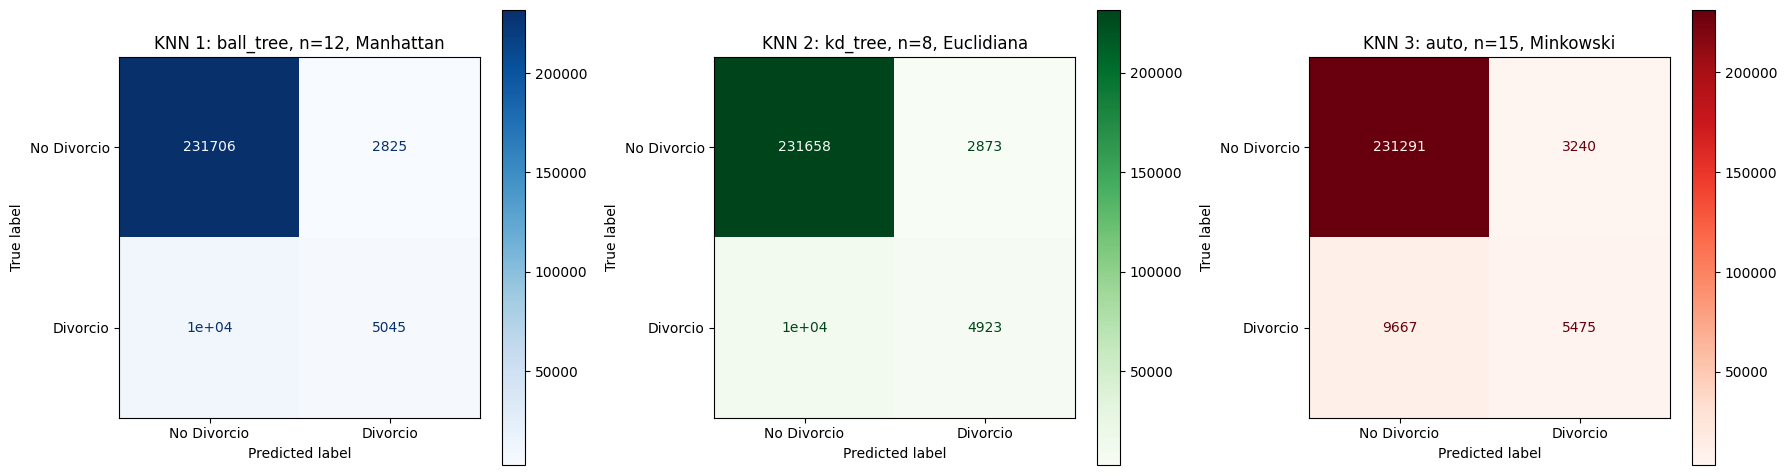

In [11]:
# Matrices de confusión para los tres modelos KNN

# Matriz de confusión para KNN 1 (parámetros originales)
cm_knn1 = confusion_matrix(y_test, y_pred_knn1)
plt.figure(figsize=(8, 6))
disp_knn1 = ConfusionMatrixDisplay(confusion_matrix=cm_knn1, display_labels=['No Divorcio', 'Divorcio'])
disp_knn1.plot(cmap='Blues')
plt.title('Matriz de Confusión - KNN 1 (ball_tree, n=12, p=1, distance)')
plt.show()

# Matriz de confusión para KNN 2
cm_knn2 = confusion_matrix(y_test, y_pred_knn2)
plt.figure(figsize=(8, 6))
disp_knn2 = ConfusionMatrixDisplay(confusion_matrix=cm_knn2, display_labels=['No Divorcio', 'Divorcio'])
disp_knn2.plot(cmap='Greens')
plt.title('Matriz de Confusión - KNN 2 (kd_tree, n=8, p=2, uniform)')
plt.show()

# Matriz de confusión para KNN 3
cm_knn3 = confusion_matrix(y_test, y_pred_knn3)
plt.figure(figsize=(8, 6))
disp_knn3 = ConfusionMatrixDisplay(confusion_matrix=cm_knn3, display_labels=['No Divorcio', 'Divorcio'])
disp_knn3.plot(cmap='Reds')
plt.title('Matriz de Confusión - KNN 3 (auto, n=15, p=1.5, distance)')
plt.show()

# Visualización conjunta de las tres matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Matriz de confusión KNN 1
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_knn1, display_labels=['No Divorcio', 'Divorcio'])
disp1.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('KNN 1: ball_tree, n=12, Manhattan')

# Matriz de confusión KNN 2
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_knn2, display_labels=['No Divorcio', 'Divorcio'])
disp2.plot(ax=axes[1], cmap='Greens')
axes[1].set_title('KNN 2: kd_tree, n=8, Euclidiana')

# Matriz de confusión KNN 3
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_knn3, display_labels=['No Divorcio', 'Divorcio'])
disp3.plot(ax=axes[2], cmap='Reds')
axes[2].set_title('KNN 3: auto, n=15, Minkowski')

plt.tight_layout()
plt.show()